In [69]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv('medical_insurance.csv')

# Medical Insurance Claim Amount Prediction
## Using Tweedie GLM and LightGBM Models

This notebook analyzes medical insurance claims data to predict claim amounts using two different approaches:
1. Tweedie Distribution GLM (Generalized Linear Model)
2. LightGBM Model

We'll compare both models' performance in predicting insurance claim amounts.

## 1. Import Required Libraries and Load Data

In [70]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")  # Using seaborn's built-in style
sns.set_palette("husl")

# Read the dataset and exclude specified columns
df = pd.read_csv('medical_insurance.csv')
columns_to_exclude = ['annual_medical_cost', 'annual_premium', 'monthly_premium', 
                     'claims_count', 'avg_claim_amount']
df = df.drop(columns=columns_to_exclude)

# Display column names
print("Column names in the dataset:")
print("-" * 50)
print(df.columns.tolist())

# Display basic information about the dataset
print("\nDataset Information:")
print("-" * 50)
print(df.info())
print("\nFirst few rows of the dataset:")
print("-" * 50)
display(df.head())
print("\nBasic statistics:")
print("-" * 50)
display(df.describe())

Column names in the dataset:
--------------------------------------------------
['person_id', 'age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']

Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeInde

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0



Basic statistics:
--------------------------------------------------


,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


## 2. Exploratory Data Analysis

Let's analyze the distribution of our target variable (insurance claims) and explore relationships between features.

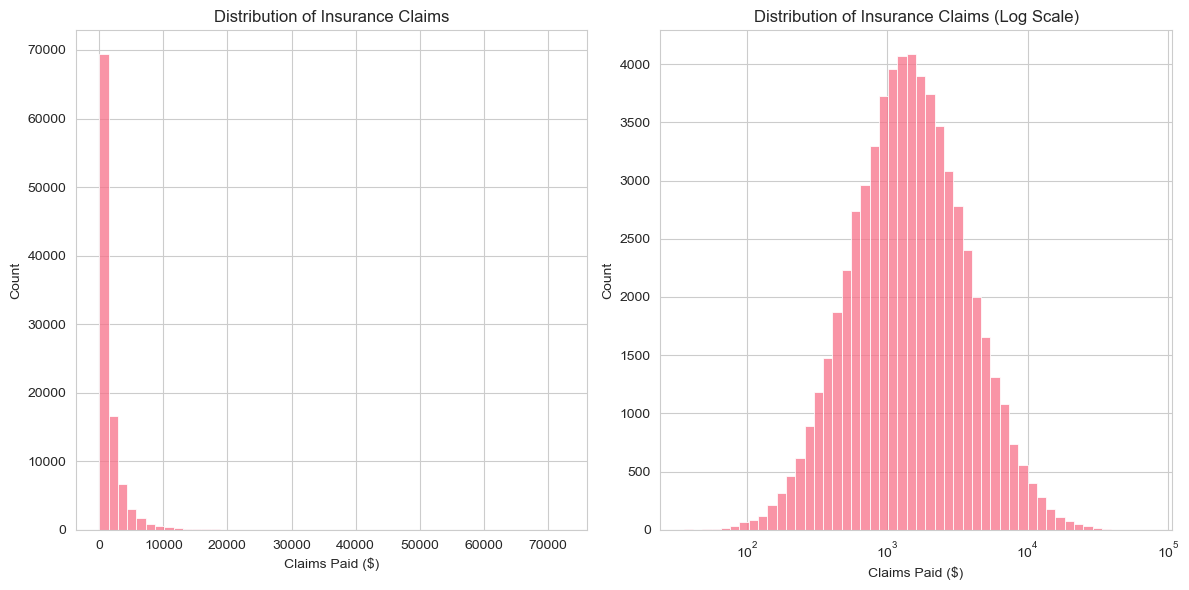


Target Variable Statistics:
--------------------------------------------------
Skewness: 4.94
Kurtosis: 53.98


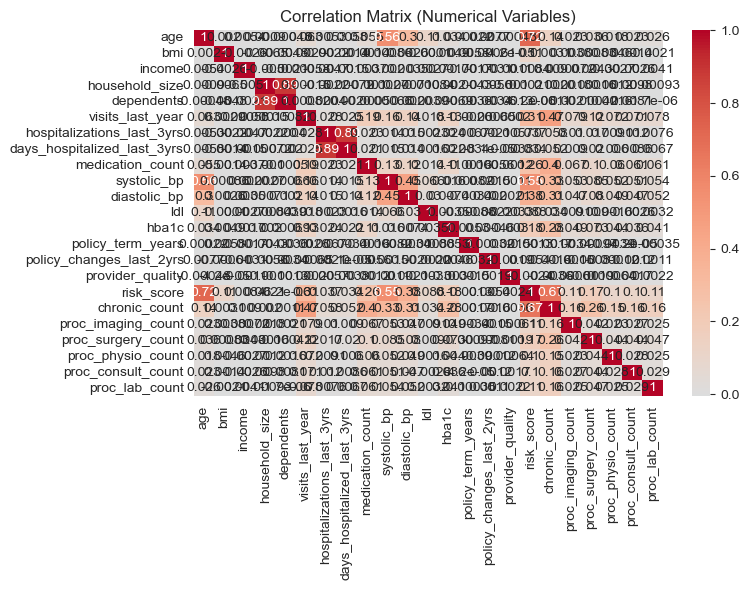

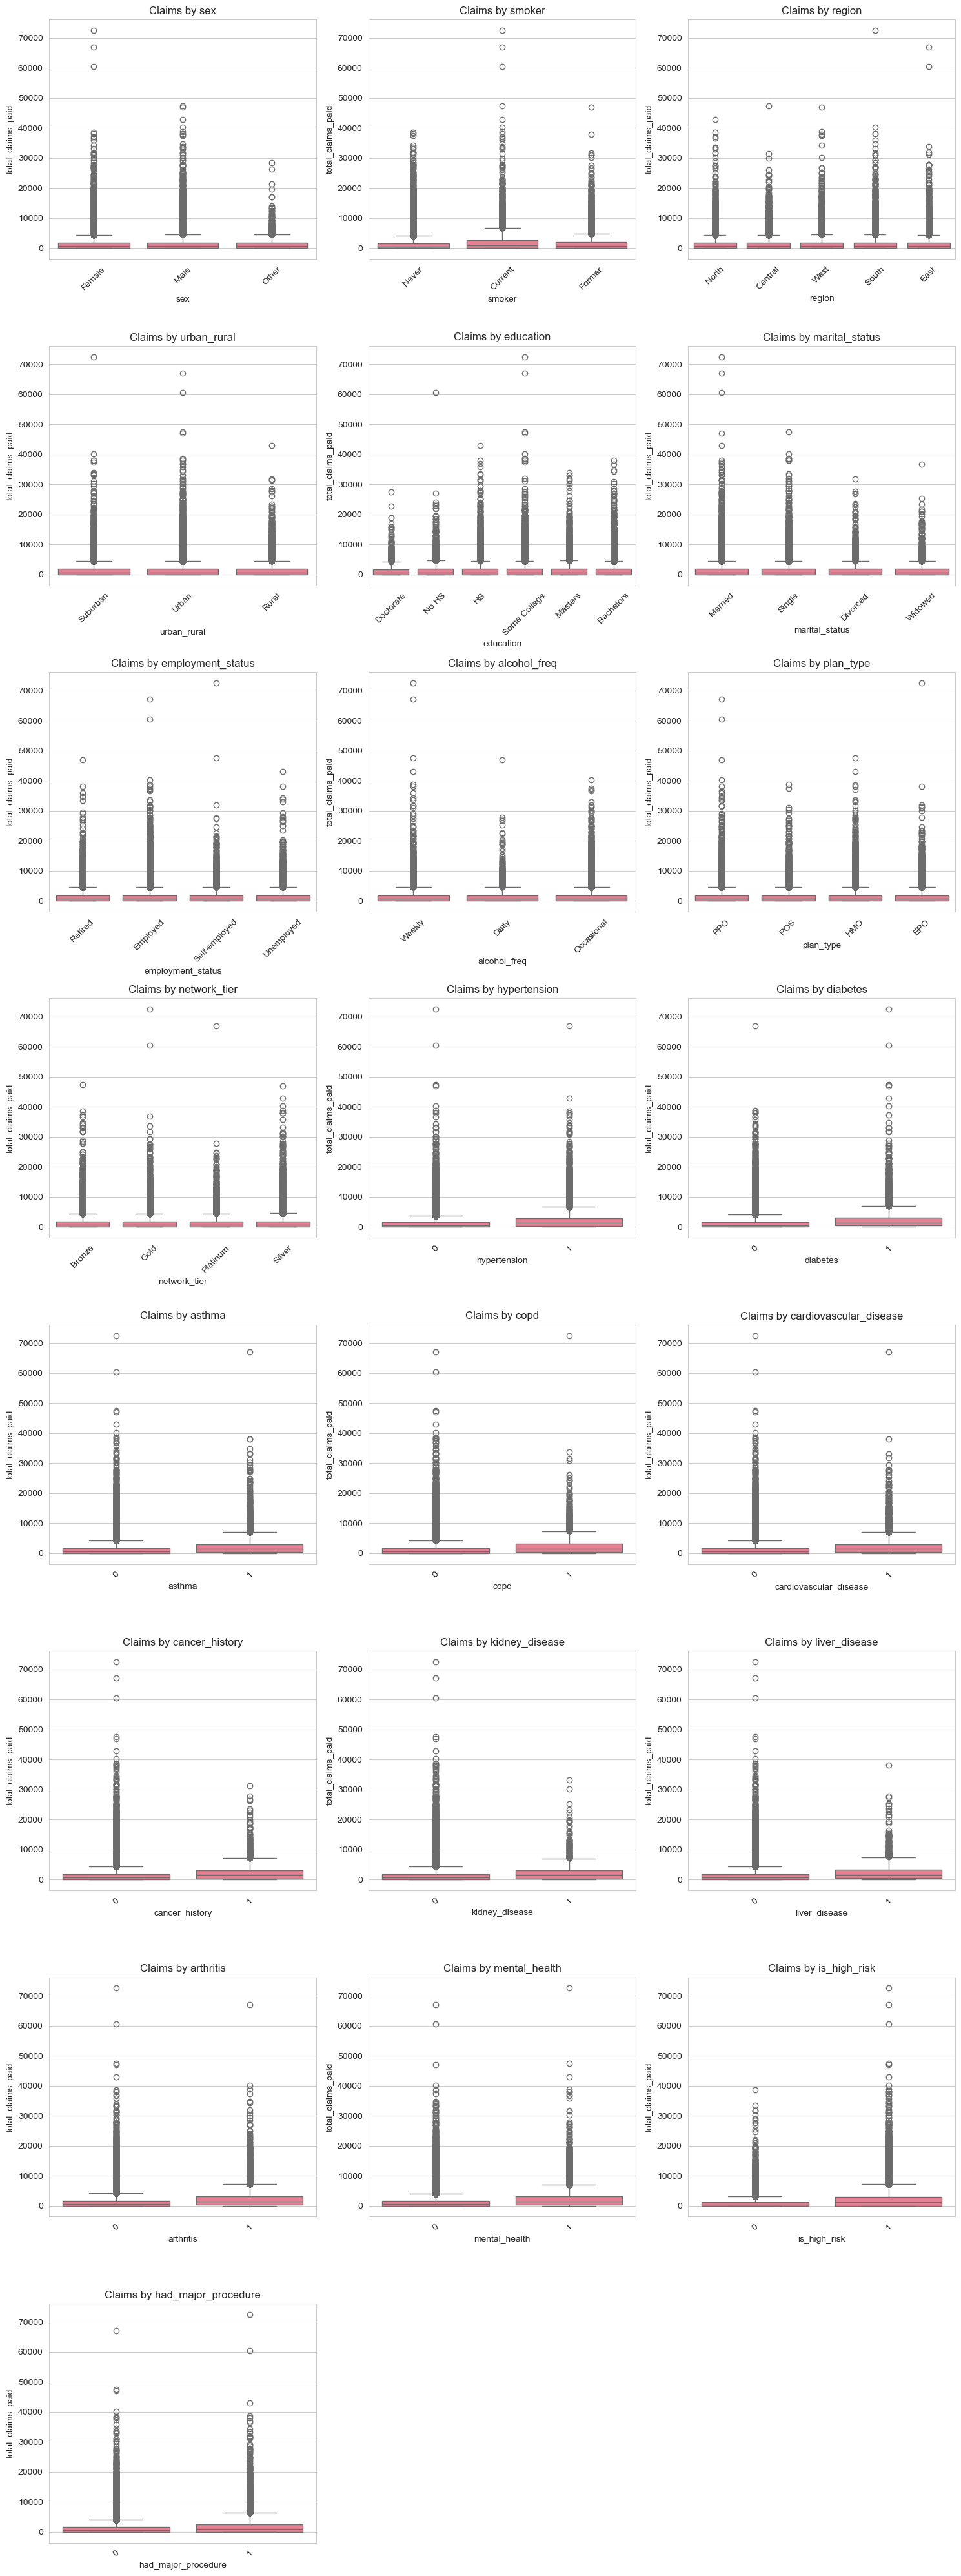


Summary Statistics by Categories:
--------------------------------------------------

Claims by sex:
          count         mean          std  min  25%      50%        75%  \
sex                                                                       
Female  49193.0  1371.078195  2295.788572  0.0  0.0  645.640  1789.7200   
Male    48794.0  1383.067386  2316.286124  0.0  0.0  638.905  1797.8325   
Other    2013.0  1418.302529  2278.745624  0.0  0.0  660.050  1828.9800   

             max  
sex               
Female  72517.95  
Male    47471.94  
Other   28487.41  

Claims by smoker:
           count         mean          std  min  25%     50%        75%  \
smoker                                                                    
Current  12128.0  1997.064329  3296.041492  0.0  0.0  961.94  2683.2375   
Former   18163.0  1446.768686  2346.860697  0.0  0.0  703.85  1922.6500   
Never    69709.0  1252.203114  2053.315512  0.0  0.0  594.82  1643.9800   

              max  
smoker      

In [71]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Analyze target variable distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_claims_paid', bins=50)
plt.title('Distribution of Insurance Claims')
plt.xlabel('Claims Paid ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_claims_paid', bins=50, log_scale=True)
plt.title('Distribution of Insurance Claims (Log Scale)')
plt.xlabel('Claims Paid ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis
print("\nTarget Variable Statistics:")
print("-" * 50)
print(f"Skewness: {df['total_claims_paid'].skew():.2f}")
print(f"Kurtosis: {df['total_claims_paid'].kurtosis():.2f}")

# Separate numerical and categorical columns
numerical_columns = ['age', 'bmi', 'income', 'household_size', 
                    'dependents', 'visits_last_year', 'hospitalizations_last_3yrs',
                    'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
                    'diastolic_bp', 'ldl', 'hba1c', 'policy_term_years', 'policy_changes_last_2yrs',
                    'provider_quality', 'risk_score', 'chronic_count', 'proc_imaging_count',
                    'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count']

categorical_columns = ['sex', 'smoker', 'region', 'urban_rural', 'education', 
                      'marital_status', 'employment_status', 'alcohol_freq', 
                      'plan_type', 'network_tier', 'hypertension', 'diabetes', 
                      'asthma', 'copd', 'cardiovascular_disease', 'cancer_history',
                      'kidney_disease', 'liver_disease', 'arthritis', 'mental_health',
                      'is_high_risk', 'had_major_procedure']

# Correlation analysis for numerical variables
plt.figure(figsize=(8, 6))
numerical_correlation = df[numerical_columns].corr()
sns.heatmap(numerical_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numerical Variables)')
plt.tight_layout()
plt.show()

# Analyze categorical variables using box plots
# We'll create multiple figures with 3 subplots each
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Ceiling division
plt.figure(figsize=(15, 5 * n_rows))

for i, cat_col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x=cat_col, y='total_claims_paid')
    plt.title(f'Claims by {cat_col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics by categorical variables
print("\nSummary Statistics by Categories:")
print("-" * 50)
for cat_col in categorical_columns:
    print(f"\nClaims by {cat_col}:")
    print(df.groupby(cat_col)['total_claims_paid'].describe())

## 3. Feature Engineering and Data Preparation

Now we'll prepare our data for modeling by:
1. Encoding categorical variables
2. Scaling numerical features
3. Creating train/test splits

In [72]:
# Prepare features
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a copy of the dataframe
df_processed = df.copy()

# Drop person_id if it exists
if 'person_id' in df_processed.columns:
    df_processed = df_processed.drop('person_id', axis=1)

# Encode all categorical variables
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

# Split features and target
X = df_processed.drop('total_claims_paid', axis=1)
y = df_processed['total_claims_paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale all numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("Features used in the model:")
print("-" * 50)
print("\nNumerical features:", len(numerical_columns))
for col in numerical_columns:
    print(f"- {col}")

print("\nCategorical features:", len(categorical_columns))
for col in categorical_columns:
    print(f"- {col}")

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Features used in the model:
--------------------------------------------------

Numerical features: 23
- age
- bmi
- income
- household_size
- dependents
- visits_last_year
- hospitalizations_last_3yrs
- days_hospitalized_last_3yrs
- medication_count
- systolic_bp
- diastolic_bp
- ldl
- hba1c
- policy_term_years
- policy_changes_last_2yrs
- provider_quality
- risk_score
- chronic_count
- proc_imaging_count
- proc_surgery_count
- proc_physio_count
- proc_consult_count
- proc_lab_count

Categorical features: 22
- sex
- smoker
- region
- urban_rural
- education
- marital_status
- employment_status
- alcohol_freq
- plan_type
- network_tier
- hypertension
- diabetes
- asthma
- copd
- cardiovascular_disease
- cancer_history
- kidney_disease
- liver_disease
- arthritis
- mental_health
- is_high_risk
- had_major_procedure

Training set shape: (80000, 47)
Testing set shape: (20000, 47)


## 4. Feature Selection using Random Forest

Let's use Random Forest to identify the most important features before building our GLM and LightGBM models.

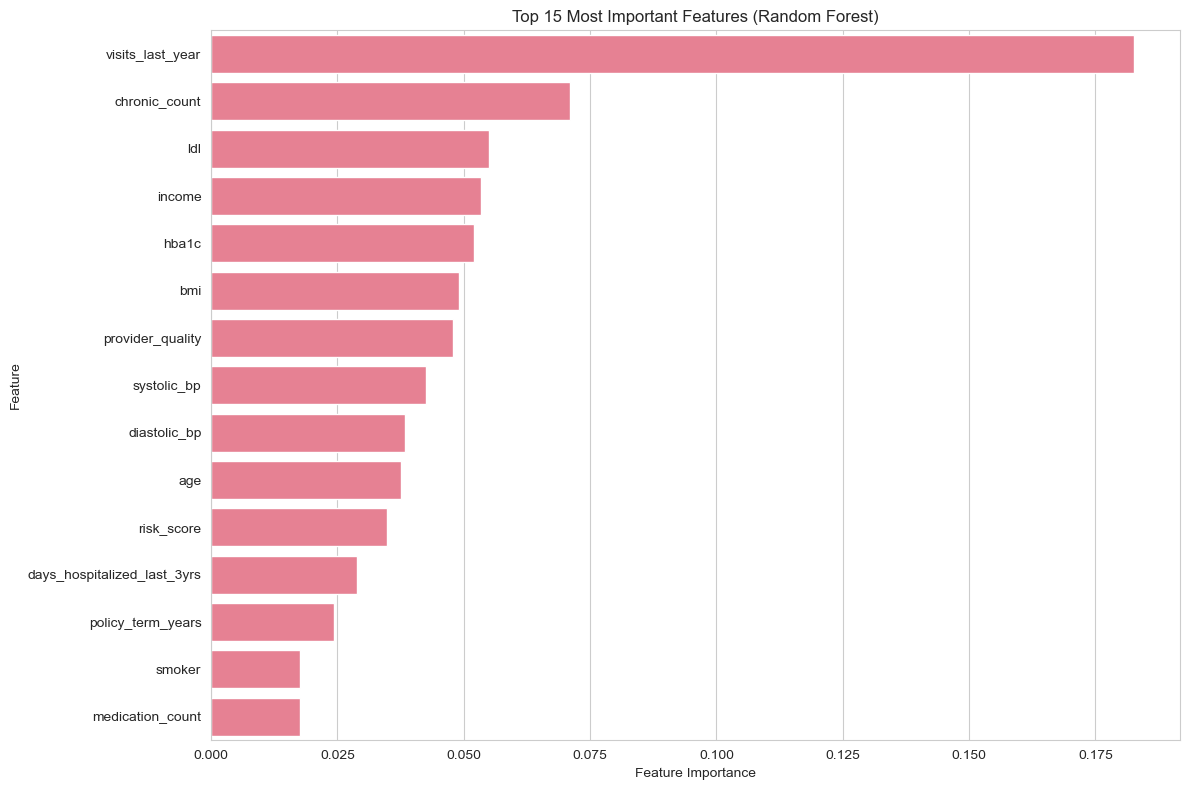


Selected Top 15 Features:
--------------------------------------------------
The following features were selected as most important:
- visits_last_year (Importance: 0.1826)
- chronic_count (Importance: 0.0710)
- ldl (Importance: 0.0551)
- income (Importance: 0.0534)
- hba1c (Importance: 0.0519)
- bmi (Importance: 0.0490)
- provider_quality (Importance: 0.0478)
- systolic_bp (Importance: 0.0425)
- diastolic_bp (Importance: 0.0384)
- age (Importance: 0.0376)
- risk_score (Importance: 0.0348)
- days_hospitalized_last_3yrs (Importance: 0.0289)
- policy_term_years (Importance: 0.0243)
- smoker (Importance: 0.0176)
- medication_count (Importance: 0.0176)

Dataset Shapes:
--------------------------------------------------
Original features: 47
Selected features: 15


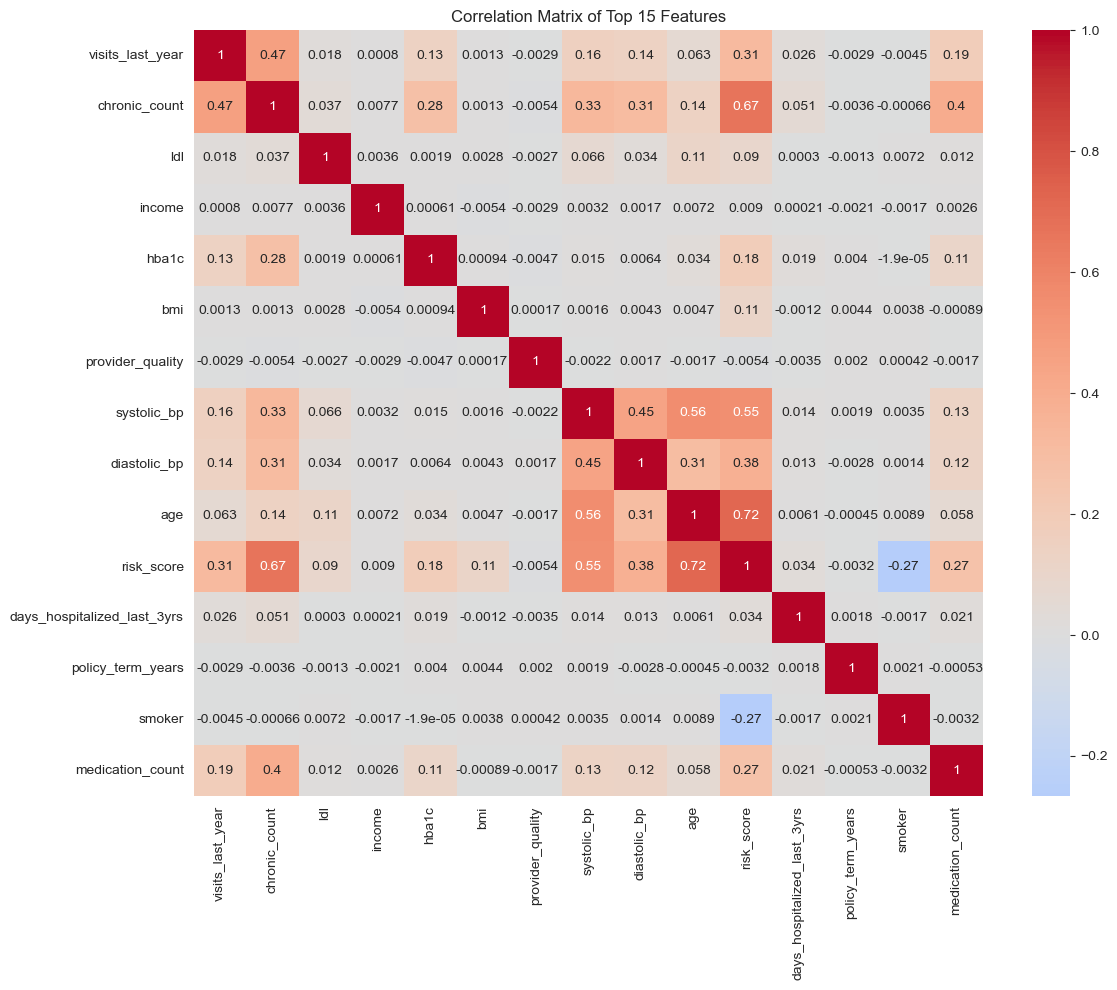

In [73]:
# Feature selection using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Initialize Random Forest model
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_selector.fit(X_train, y_train)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_selector.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance (top 15)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Select top 15 features
top_15_features = feature_importance.head(15)['Feature'].tolist()

# Create datasets with selected features only
X_train_selected = X_train[top_15_features]
X_test_selected = X_test[top_15_features]

print("\nSelected Top 15 Features:")
print("-" * 50)
print("The following features were selected as most important:")
for feature in top_15_features:
    importance = feature_importance[feature_importance['Feature'] == feature]['Importance'].values[0]
    print(f"- {feature} (Importance: {importance:.4f})")

# Compare shapes
print("\nDataset Shapes:")
print("-" * 50)
print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

# Create a DataFrame with selected features for further modeling
X_train_final = X_train_selected
X_test_final = X_test_selected

# Plot correlation heatmap for selected features
plt.figure(figsize=(12, 10))
correlation_matrix = X_train_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top 15 Features')
plt.tight_layout()
plt.show()

## 5. GLM Model Implementation

Now we'll implement a Generalized Linear Model using the selected features from our Random Forest analysis.

In [74]:
# Import sklearn's TweedieRegressor
from sklearn.linear_model import TweedieRegressor

def calculate_lift_gini(y_true, y_pred, n_bins=10):
    """
    Calculate lift table and Gini coefficient.
    
    Args:
        y_true: Actual target values
        y_pred: Predicted target values
        n_bins: Number of bins (deciles by default)
        
    Returns:
        lift_table: DataFrame with lift information
        gini_coefficient: Gini coefficient value
    """
    # Create DataFrame with actual and predicted values
    df = pd.DataFrame({
        'actual': y_true,
        'predicted': y_pred
    })
    
    # Sort by predicted values and assign to deciles
    df['decile'] = pd.qcut(df['predicted'], q=n_bins, labels=[i+1 for i in range(n_bins)])
    
    # Calculate average actual value for each decile
    lift_table = df.groupby('decile').agg({
        'actual': 'mean',
        'predicted': 'mean'
    }).reset_index()
    
    # Calculate Gini coefficient
    # Sort actual values by predicted values
    df_sorted = df.sort_values('predicted')
    actual_cumsum = np.cumsum(df_sorted['actual']) / np.sum(df_sorted['actual'])
    # Add 0 at the beginning for the complete curve
    actual_cumsum = np.insert(actual_cumsum, 0, 0)
    
    # Create uniform distribution for perfect equality line
    n = len(actual_cumsum)
    line_of_equality = np.linspace(0, 1, n)
    
    # Calculate area under the curve and Gini coefficient
    area_under_curve = np.trapz(actual_cumsum, x=line_of_equality)
    area_of_equality = 0.5  # Area under the line of perfect equality
    gini_coefficient = 2 * (area_of_equality - area_under_curve)
    
    return lift_table, gini_coefficient

GLM Model Performance:
--------------------------------------------------
RMSE: $7937.49
MAE: $1279.41

GLM Model Coefficients (after dropping age and smoker):
--------------------------------------------------
Note: Coefficients are in log scale. Exp(Coefficient) shows multiplicative effect.
                        Feature  Coefficient  Exp(Coefficient)
0              visits_last_year       0.4511            1.5700
9                    risk_score       0.2298            1.2583
1                 chronic_count       0.1511            1.1631
10  days_hospitalized_last_3yrs       0.1447            1.1557
5                           bmi       0.0224            1.0226
8                  diastolic_bp       0.0140            1.0141
11            policy_term_years       0.0038            1.0038
4                         hba1c      -0.0034            0.9966
3                        income      -0.0055            0.9945
6              provider_quality      -0.0058            0.9942
2            

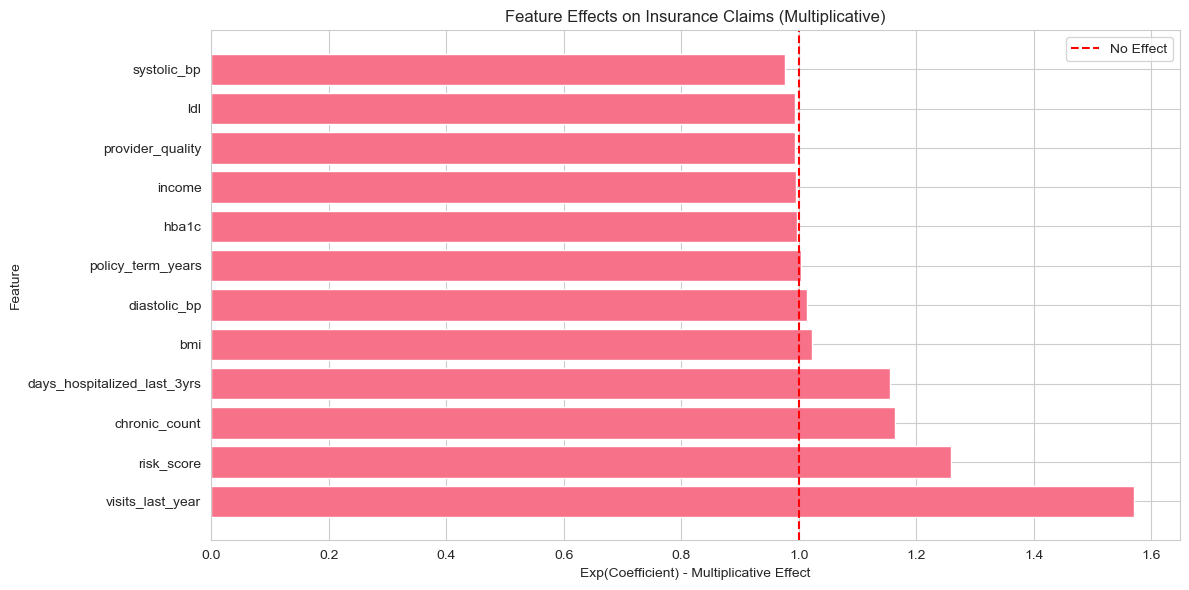

gini_coef: 0.44


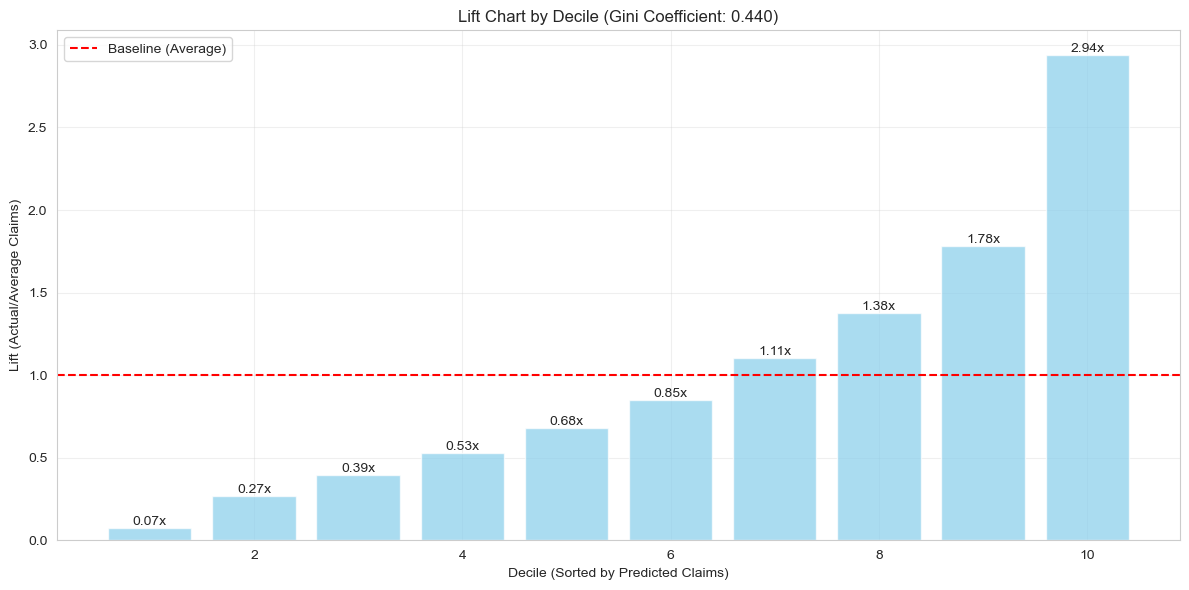


Lift Table:
------------------------------------------------------------
  decile    actual  predicted  lift_ratio
0      1   101.557    420.934       0.074
1      2   366.777    530.507       0.269
2      3   536.233    626.097       0.393
3      4   718.826    731.450       0.527
4      5   930.038    855.418       0.682
5      6  1156.739   1011.448       0.849
6      7  1507.755   1217.867       1.106
7      8  1875.951   1527.330       1.376
8      9  2430.169   2090.740       1.783
9     10  4008.487   6133.629       2.940


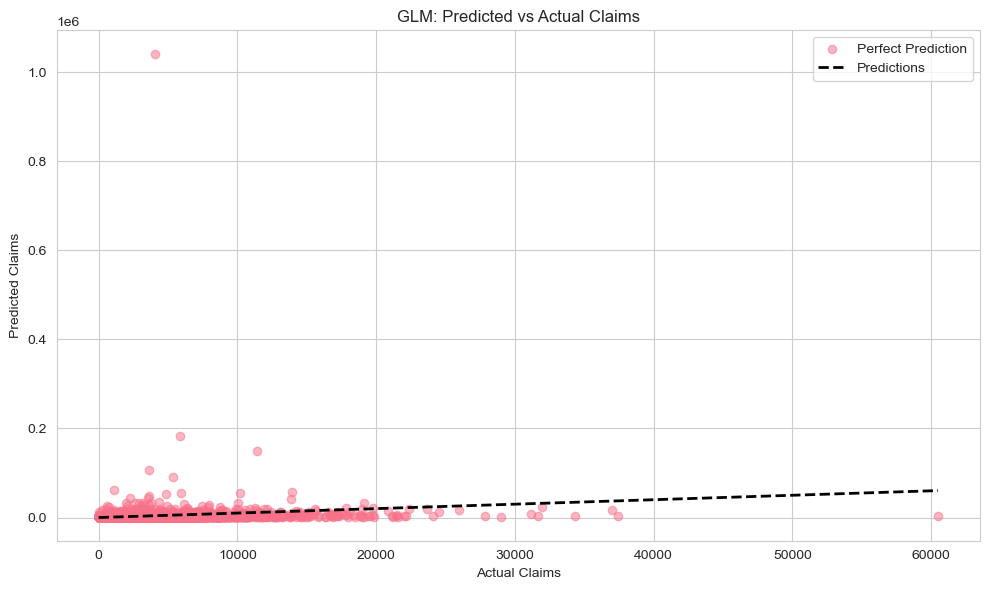

In [90]:
# Create binary age variable from the original age feature before dropping it
age_bins = (X_train_selected['age'] < 25).astype(int)
age_bins_test = (X_test_selected['age'] < 25).astype(int)

# Create copies of the selected features
X_train_modified = X_train_selected.copy()
X_test_modified = X_test_selected.copy()

# Add binary age feature
X_train_modified['age_under_25'] = age_bins
X_test_modified['age_under_25'] = age_bins_test

# Drop original age and smoker features
features_to_drop = ['age', 'smoker','medication_count','age_under_25']
X_train_modified = X_train_modified.drop(columns=[col for col in features_to_drop if col in X_train_modified.columns])
X_test_modified = X_test_modified.drop(columns=[col for col in features_to_drop if col in X_test_modified.columns])

# Train Tweedie GLM model
glm = TweedieRegressor(power=1.5, alpha=0.5, link='log')
glm.fit(X_train_modified, y_train)

# Make predictions
y_pred_glm_selected = glm.predict(X_test_modified)

# Calculate performance metrics
mse_glm = mean_squared_error(y_test, y_pred_glm_selected)
rmse_glm = np.sqrt(mse_glm)
mae_glm = mean_absolute_error(y_test, y_pred_glm_selected)

print("GLM Model Performance:")
print("-" * 50)
print(f"RMSE: ${rmse_glm:.2f}")
print(f"MAE: ${mae_glm:.2f}")

# Display model coefficients
features_final = list(X_train_modified.columns)
coef_df = pd.DataFrame({
    'Feature': features_final,
    'Coefficient': glm.coef_,
    'Exp(Coefficient)': np.exp(glm.coef_)
})
coef_df = coef_df.sort_values('Exp(Coefficient)', ascending=False)

print("\nGLM Model Coefficients (after dropping age and smoker):")
print("-" * 50)
print("Note: Coefficients are in log scale. Exp(Coefficient) shows multiplicative effect.")
print(coef_df.round(4))

# Visualize coefficients
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Exp(Coefficient)'])
plt.title('Feature Effects on Insurance Claims (Multiplicative)')
plt.xlabel('Exp(Coefficient) - Multiplicative Effect')
plt.ylabel('Feature')
plt.axvline(x=1, color='r', linestyle='--', label='No Effect')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate lift table and Gini coefficient
lift_table, gini_coef = calculate_lift_gini(y_test, y_pred_glm_selected)

print(f"gini_coef: {gini_coef:.2f}")
# Create bar-based lift chart
plt.figure(figsize=(12, 6))

# Create bar chart for the lift
bars = plt.bar(lift_table['decile'], 
               lift_table['actual'] / lift_table['actual'].mean(),
               alpha=0.7,
               color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}x',
             ha='center', va='bottom')

# Add reference line at y=1
plt.axhline(y=1, color='r', linestyle='--', label='Baseline (Average)')

plt.xlabel('Decile (Sorted by Predicted Claims)')
plt.ylabel('Lift (Actual/Average Claims)')
plt.title(f'Lift Chart by Decile (Gini Coefficient: {gini_coef:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print lift table with lift ratios
lift_table['lift_ratio'] = lift_table['actual'] / lift_table['actual'].mean()
print("\nLift Table:")
print("-" * 60)
print(lift_table.round(3))

# Plot actual vs predicted claims
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_glm_selected, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Claims')
plt.ylabel('Predicted Claims')
plt.title('GLM: Predicted vs Actual Claims')
plt.legend(['Perfect Prediction', 'Predictions'])
plt.tight_layout()
plt.show()




## 6. LightGBM Model Implementation

Now we'll implement a LightGBM model using the selected features, which is particularly effective for tabular data and can handle the Tweedie distribution.

In [96]:
# Install LightGBM if not already installed
import sys
!{sys.executable} -m pip install lightgbm

Training LightGBM model with same features as GLM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1601
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 12
[LightGBM] [Info] Start training from score 7.230951
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 2134.9	valid_1's rmse: 2078.48
[20]	training's rmse: 2045.54	valid_1's rmse: 1989.38
[30]	training's rmse: 2000.77	valid_1's rmse: 1945.19
[40]	training's rmse: 1977.01	valid_1's rmse: 1923.98
[50]	training's rmse: 1963.13	valid_1's rmse: 1913.62
[60]	training's rmse: 1953.41	valid_1's rmse: 1909.01
[70]	training's rmse: 1946.22	valid_1's rmse: 1907.41
[40]	training's rmse: 1977.01	valid_1's rmse: 1923.98
[50]	training's rmse: 1963.13	valid_1's rmse: 191

<Figure size 1000x600 with 0 Axes>

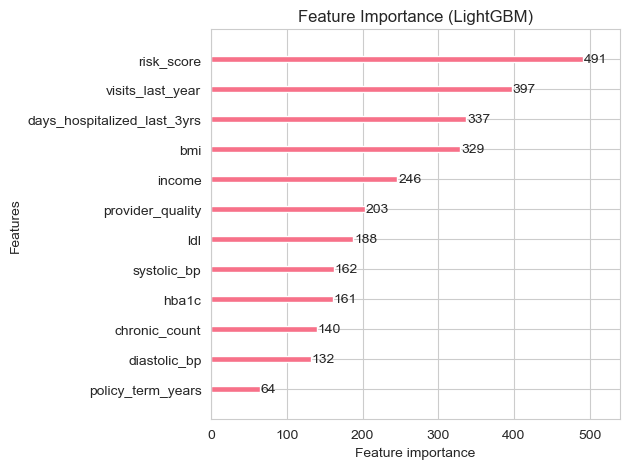


LightGBM Gini Coefficient: 0.468


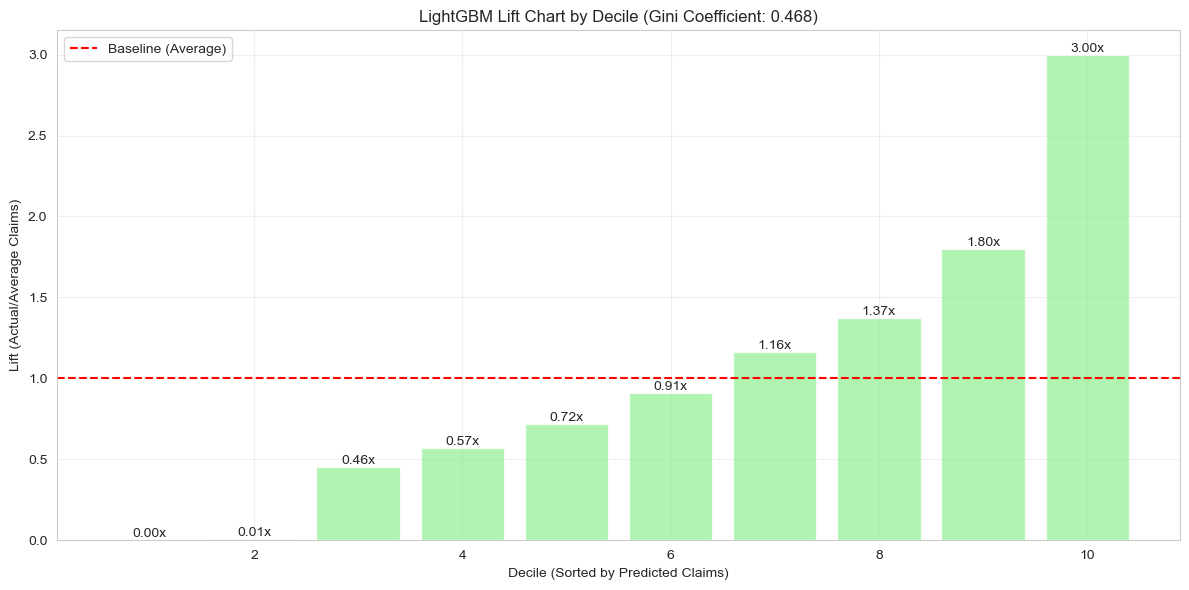

In [99]:
# Create copies of the selected features
X_train_modified = X_train_selected.copy()
X_test_modified = X_test_selected.copy()

# Drop the same features as GLM model
features_to_drop = ['age', 'smoker', 'medication_count', 'age_under_25']
X_train_modified = X_train_modified.drop(columns=[col for col in features_to_drop if col in X_train_modified.columns])
X_test_modified = X_test_modified.drop(columns=[col for col in features_to_drop if col in X_test_modified.columns])

import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# Create LightGBM datasets using the modified feature set
lgb_train = lgb.Dataset(X_train_modified, y_train)
lgb_eval = lgb.Dataset(X_test_modified, y_test, reference=lgb_train)

# Set parameters for Tweedie regression
params = {
    'objective': 'tweedie',
    'tweedie_variance_power': 1.5,
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
print("Training LightGBM model with same features as GLM...")
callbacks = [lgb.early_stopping(stopping_rounds=10),
            lgb.log_evaluation(period=10)]
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=callbacks
)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test_modified)

# Calculate performance metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

print("\nLightGBM Model Performance:")
print("-" * 50)
print(f"RMSE: ${rmse_lgb:.2f}")
print(f"MAE: ${mae_lgb:.2f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=len(X_train_modified.columns))
plt.title('Feature Importance (LightGBM)')
plt.tight_layout()
plt.show()

# Calculate lift table and Gini coefficient for LightGBM
lift_table_lgb, gini_coef_lgb = calculate_lift_gini(y_test, y_pred_lgb)
print(f"\nLightGBM Gini Coefficient: {gini_coef_lgb:.3f}")

# Create bar-based lift chart for LightGBM
plt.figure(figsize=(12, 6))
bars = plt.bar(lift_table_lgb['decile'], 
               lift_table_lgb['actual'] / lift_table_lgb['actual'].mean(),
               alpha=0.7,
               color='lightgreen')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}x',
             ha='center', va='bottom')

plt.axhline(y=1, color='r', linestyle='--', label='Baseline (Average)')
plt.xlabel('Decile (Sorted by Predicted Claims)')
plt.ylabel('Lift (Actual/Average Claims)')
plt.title(f'LightGBM Lift Chart by Decile (Gini Coefficient: {gini_coef_lgb:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Model Comparison and Evaluation

Let's compare the performance of both models and visualize their predictions.

,Model,RMSE,MAE,Gini
0,Tweedie GLM,7937.492781,1279.406468,0.439936
1,LightGBM,1905.670437,1027.303154,0.468046


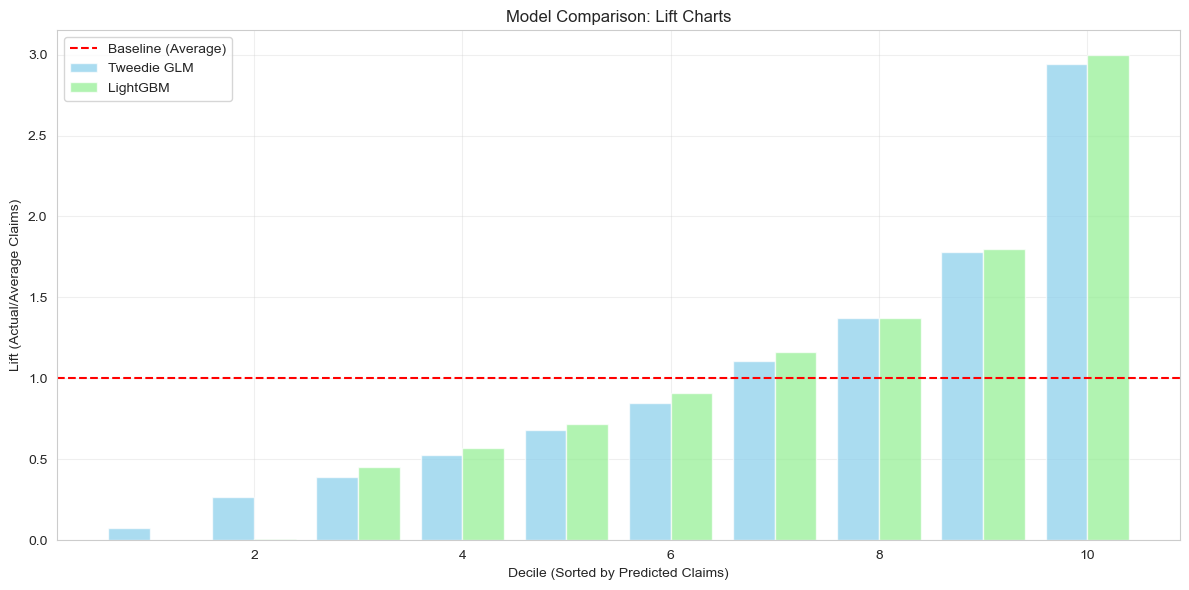

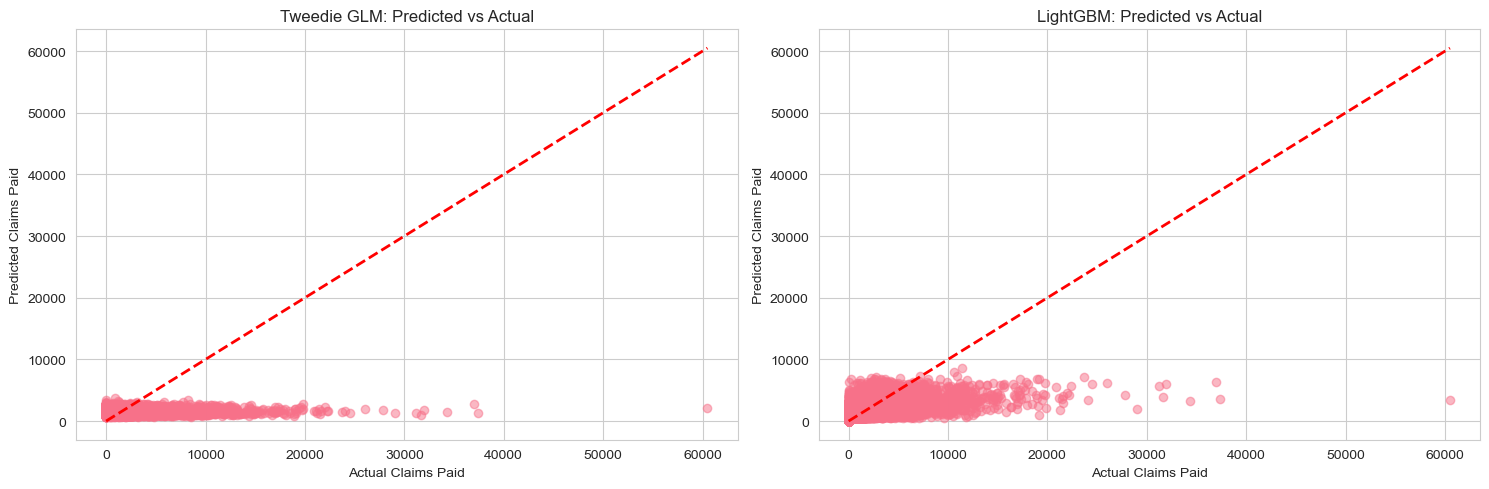

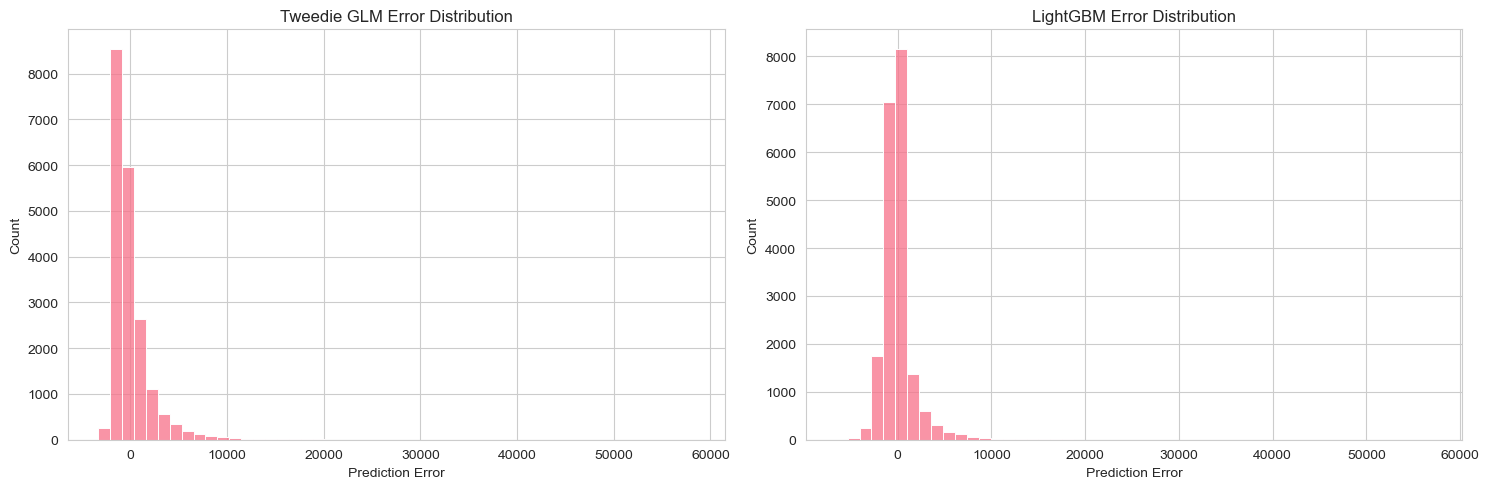


Error Statistics:
--------------------------------------------------
Tweedie GLM:
Mean Error: $-13.76
Error Std Dev: $2236.03

LightGBM:
Mean Error: $-0.06
Error Std Dev: $1905.72


In [102]:
# Compare model performances
results = pd.DataFrame({
    'Model': ['Tweedie GLM', 'LightGBM'],
    'RMSE': [rmse_glm, rmse_lgb],
    'MAE': [mae_glm, mae_lgb],
    'Gini': [gini_coef, gini_coef_lgb]
})
display(results)

# Create combined lift chart
plt.figure(figsize=(12, 6))
# Convert deciles to numeric values
deciles_glm = lift_table['decile'].astype(int)
deciles_lgb = lift_table_lgb['decile'].astype(int)

plt.bar(deciles_glm - 0.2, 
        lift_table['actual'] / lift_table['actual'].mean(),
        width=0.4,
        alpha=0.7,
        color='skyblue',
        label='Tweedie GLM')
plt.bar(deciles_lgb + 0.2, 
        lift_table_lgb['actual'] / lift_table_lgb['actual'].mean(),
        width=0.4,
        alpha=0.7,
        color='lightgreen',
        label='LightGBM')

plt.axhline(y=1, color='r', linestyle='--', label='Baseline (Average)')
plt.xlabel('Decile (Sorted by Predicted Claims)')
plt.ylabel('Lift (Actual/Average Claims)')
plt.title('Model Comparison: Lift Charts')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(15, 5))

# Tweedie GLM predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_glm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Claims Paid')
plt.ylabel('Predicted Claims Paid')
plt.title('Tweedie GLM: Predicted vs Actual')

# LightGBM predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Claims Paid')
plt.ylabel('Predicted Claims Paid')
plt.title('LightGBM: Predicted vs Actual')

plt.tight_layout()
plt.show()

# Calculate prediction errors
glm_errors = y_test - y_pred_glm
lgb_errors = y_test - y_pred_lgb

# Plot error distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(glm_errors, bins=50)
plt.title('Tweedie GLM Error Distribution')
plt.xlabel('Prediction Error')

plt.subplot(1, 2, 2)
sns.histplot(lgb_errors, bins=50)
plt.title('LightGBM Error Distribution')
plt.xlabel('Prediction Error')

plt.tight_layout()
plt.show()

# Print summary statistics of errors
print("\nError Statistics:")
print("-" * 50)
print("Tweedie GLM:")
print(f"Mean Error: ${glm_errors.mean():.2f}")
print(f"Error Std Dev: ${glm_errors.std():.2f}")
print("\nLightGBM:")
print(f"Mean Error: ${lgb_errors.mean():.2f}")
print(f"Error Std Dev: ${lgb_errors.std():.2f}")

In [103]:
# Export LightGBM model to pickle file
import pickle

# Save the model
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

print("LightGBM model exported successfully to 'lightgbm_model.pkl'")
print(f"Model file location: /Users/qingcai/Desktop/kaggle_Medical_Insurance/lightgbm_model.pkl")

LightGBM model exported successfully to 'lightgbm_model.pkl'
Model file location: /Users/qingcai/Desktop/kaggle_Medical_Insurance/lightgbm_model.pkl
